In [1]:
import time 
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure

sns.set_palette('Accent')
sns.set_style('darkgrid')

In [2]:
# TAMANHO VETOR 100K - 10M
# ELEMENTOS DE 0 À 10M

vetorzao1 = np.random.randint(10000000, size=(400000))
vetorzao2 = np.random.randint(10000000, size=(800000))
vetorzao3 = np.random.randint(10000000, size=(1000000))
vetorzao4 = np.random.randint(10000000, size=(1300000))
vetorzao5 = np.random.randint(10000000, size=(1600000))
vetorzao6 = np.random.randint(10000000, size=(1900000))

# TAMANHO VETOR 20K
veto1 = list(range(0,200000))
veto2 = list(range(0,400000))
veto3 = list(range(0,600000))
veto4 = list(range(0,800000))
veto5 = list(range(0,1000000))
veto6 = list(range(0,1200000))



## Quick Sort

#### Características:

* Instável 
* Operações Locais (in-place)
* Dividir e Conquistar 
* O(n log n)

#### Definição e Lógica:

Usando a abordegam de dividir e conquistar o Quick Sort usa da partição como lógica principal do algorítimo. Uma das característica do Quick Sort é a instabilidade que não pode ser ajustada com mudanças no código.

A estratégia consiste em rearranjar as chaves de modo que as chaves menores fiquem antes das chaves maiores. Em seguida o quicksort ordena as duas sublistas de chaves menores e maiores recursivamente até que a lista completa se encontre ordenada. Os passos são:

1. Escolher pivô;

2. Particionar: rearranjar a lista de forma que todos os elementos anteriores ao pivô sejam menores que ele, e todos os elementos posteriores ao pivô sejam maiores que ele. Ao fim do processo o pivô estará em sua posição final e haverá duas sublistas não ordenadas;

3. Recursivamente ordenar a sublista dos elementos menores e a sublista dos elementos maiores;

4. O caso base da recursão são as listas de tamanho zero ou um, que estão sempre ordenadas. O processo é finito, pois a cada iteração pelo menos um elemento é posto em sua posição final e não será mais manipulado na iteração seguinte.

A escolha do pivô e os passos do Particionar podem ser feitos de diferentes formas e a escolha de uma implementação específica afeta fortemente a performance do algoritmo. A escolha de um pivo ruim pode implicar a mudança de complexidade do algoritmo de O(n log n) para O(n²), por isso escolhemos o Quick Sort usando a mediana de três que consiste em achar qual o melhor pivo entre o primeiro o último e o índice do méio, sendo ele, o pivo, a mediana entre eles, fazendo assim com que mesmo que o vetor esteja ordenado o Quick Sort não caia no pior caso O(n²).

In [3]:
def quick_sort(array, begin,end):
    if begin < end:
        new_begin_end = particion(array, begin, end)
        
        #Chamada recursiva
        quick_sort(array, begin, new_begin_end - 1) # Quick Sort para subarray de zero a pivo - 1
        quick_sort(array, new_begin_end + 1, end) # Quick Sort para subarray de pivo + 1 a fim 

        
def particion(array, begin, end) -> (int):
    
    # Observe que os nomes em português são valores e os inglês são índices
    middle = (begin + end) // 2
    inicio = array[begin]
    meio = array[middle]
    final = array[end]
    
    # Comparação entre entre inicio, meio e fim para achar a mediana
    if inicio < meio:
        if meio < final:
            mediana_index = middle
        else:
            if inicio < final:
                mediana_index = end
            else:
                mediana_index = begin
    else:
        if final < meio:
            mediana_index = middle
        else:
            if final < inicio:
                mediana_index = end
            else: 
                mediana_index = begin
                
    # Swap
    array[mediana_index], array[end] = array[end], array[mediana_index]
    
    pivo = array[end]
    i = begin - 1
    
    for j in range(begin, end+1):
        if array[j] <= pivo: # Fonte da instabilidade
            i += 1
            array[i], array[j] = array[j], array[i]
                     
    return i 

In [4]:
#VETOR 10M
start12_quick = time.time()
quick_sort(vetorzao6, 0, len(vetorzao6) - 1)
end12_quick = time.time()

#VETOR 5M
start11_quick = time.time()
quick_sort(vetorzao5, 0, len(vetorzao5) - 1)
end11_quick = time.time()

#VETOR 2M
start10_quick = time.time()
quick_sort(vetorzao4, 0, len(vetorzao4) - 1)
end10_quick = time.time()

#VETOR 1M
start9_quick = time.time()
quick_sort(vetorzao3, 0, len(vetorzao3) - 1)
end9_quick = time.time()

#VETOR 500K
start8_quick = time.time()
quick_sort(vetorzao2, 0, len(vetorzao2) - 1)
end8_quick = time.time()

#VETOR 100K
start7_quick = time.time()
quick_sort(vetorzao1, 0, len(vetorzao1) - 1)
end7_quick = time.time()

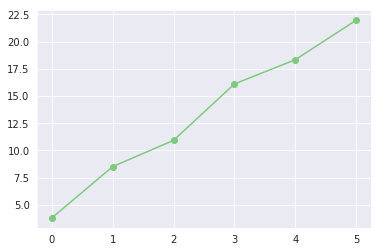

In [5]:
q7 = end7_quick - start7_quick
q8 = end8_quick - start8_quick
q9 = end9_quick - start9_quick
q10 = end10_quick - start10_quick
q11 = end11_quick - start11_quick
q12 = end12_quick - start12_quick

quick = [q7,q8,q9,q10,q11,q12]

plt.plot(quick, linestyle='-', marker='o')

## Shell
Shell sort é o mais eficiente algoritmo de classificação dentre os de complexidade quadrática. É um refinamento do método de inserção direta. O algoritmo difere do método de inserção direta pelo fato de no lugar de considerar o array a ser ordenado como um único segmento, ele considera vários segmentos sendo aplicado o método de inserção direta em cada um deles. Basicamente o algoritmo passa várias vezes pela lista dividindo o grupo maior em menores. Os grupos menores é aplicado o método da ordenação por insertion sort.

In [6]:
def shell_sort(arr): 
  
    # Start with a big gap, then reduce the gap 
    n = len(arr) 
    gap = n//2
  
    # Do a gapped insertion sort for this gap size. 
    # The first gap elements a[0..gap-1] are already in gapped  
    # order keep adding one more element until the entire array 
    # is gap sorted 
    while gap > 0: 
  
        for i in range(gap,n): 
  
            # add a[i] to the elements that have been gap sorted 
            # save a[i] in temp and make a hole at position i 
            temp = arr[i] 
  
            # shift earlier gap-sorted elements up until the correct 
            # location for a[i] is found 
            j = i 
            while  j >= gap and arr[j-gap] >temp: 
                arr[j] = arr[j-gap] 
                j -= gap 
  
            # put temp (the original a[i]) in its correct location 
            arr[j] = temp 
        gap //= 2

In [7]:
#VETOR 200K
start1_shell = time.time()
shell_sort(vetorzao1)
end1_shell = time.time()

#VETOR 400K
start2_shell = time.time()
shell_sort(vetorzao2)
end2_shell = time.time()

#VETOR 600K
start3_shell = time.time()
shell_sort(vetorzao3)
end3_shell = time.time()

#VETOR 800K
start4_shell = time.time()
shell_sort(vetorzao4)
end4_shell = time.time()

#VETOR 1M
start5_shell = time.time()
shell_sort(vetorzao5)
end5_shell = time.time()

#VETOR 1.2M
start6_shell = time.time()
shell_sort(vetorzao6)
end6_shell = time.time()

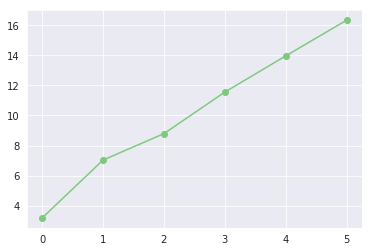

In [8]:
l1 = end1_shell - start1_shell
l2 = end2_shell - start2_shell
l3 = end3_shell - start3_shell
l4 = end4_shell - start4_shell
l5 = end5_shell - start5_shell
l6 = end6_shell - start6_shell

shell = [l1,l2,l3,l4,l5,l6]

plt.plot(shell, linestyle='-', marker='o')

## Counting Sort

Counting sort é um algoritmo de ordenação estável cuja complexidade é O(n). A ideia básica do counting sort é achar o valor do maior e menor item do vetor para assim criar um vetor intermediário, que começa no índice do menor item e termina no do maior, possuindo todas as posições entre eles. Nesse vetor é armazenado a quantidade de vezes em que os valores aparecem, por exemplo para o vetor *v = [4,5,7,7,6,5]*, o vetor intermediário é *vi = [1,2,1,2]* lembrando que ele começa na posição 4 a posição 7 está armazenado o número dois pois o 7 aparece duas vezes no vetor. O próximo passo é fazer o vetor acumulado, que é a soma indice a indice do vetor intermediário, *Vac = [1,3,4,6]*, perceba que na última posição deve haver o número de itens do vetor V. O último passo é de trás para frente do vetor V colocar o item na posição indicada pelo vetor Vac e diminuir o índice que está nele.

* v = [ , , , , , ]  vac = [1,3,4,6]
* v = [ , ,5, , , ]  vac = [1,2,4,6]
* v = [ , ,5,6, , ]  vac = [1,2,3,6]
* v = [ , ,5,6, ,7]  vac = [1,2,3,5]
* v = [ , ,5,6,7,7]  vac = [1,2,3,4]
* v = [ ,5,5,6,7,7]  vac = [1,1,3,4]
* v = [4,5,5,6,7,7]  vac = [0,1,3,4]

Perceba que o primeiro item do vetor acumulado é zarado, assim como o último é igual a quantidade de itens do vetor V, esses são indícios da aplicação correta do método.

In [9]:
def counting_sort( alist ):
    a = max( alist )
    counter = [0] * ( a + 1 )
    for i in alist:
        counter[i] += 1
    ndx = 0;
    
    for i in range( len( counter ) ):
        while 0 < counter[i]:
            alist[ndx] = i
            ndx += 1
            counter[i] -= 1

#### Chamando o Counting para vetores de tamanho 100k até 10M e calculando o tempo de execução*

In [10]:
#VETOR 200K
start1_counting = time.time()
counting_sort(vetorzao1)
end1_counting = time.time()

#VETOR 400K
start2_counting = time.time()
counting_sort(vetorzao2)
end2_counting = time.time()

#VETOR 600K
start3_counting = time.time()
counting_sort(vetorzao3)
end3_counting = time.time()

#VETOR 800K
start4_counting = time.time()
counting_sort(vetorzao4)
end4_counting = time.time()

#VETOR 1M
start5_counting = time.time()
counting_sort(vetorzao5)
end5_counting = time.time()

#VETOR 1.2M
start6_counting = time.time()
counting_sort(vetorzao6)
end6_counting = time.time()

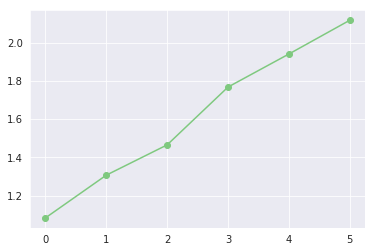

In [11]:
m1 = end1_counting - start1_counting
m2 = end2_counting - start2_counting
m3 = end3_counting - start3_counting
m4 = end4_counting - start4_counting
m5 = end5_counting - start5_counting
m6 = end6_counting - start6_counting

counting = [m1,m2,m3,m4,m5,m6]
plt.plot(counting, linestyle='-', marker='o')

### Counting Ordenado

In [12]:
#VETOR 200K
start1_counting = time.time()
counting_sort(veto1)
end1_counting = time.time()

#VETOR 400K
start2_counting = time.time()
counting_sort(veto2)
end2_counting = time.time()

#VETOR 600K
start3_counting = time.time()
counting_sort(veto3)
end3_counting = time.time()

#VETOR 800K
start4_counting = time.time()
counting_sort(veto4)
end4_counting = time.time()

#VETOR 1M
start5_counting = time.time()
counting_sort(veto5)
end5_counting = time.time()

#VETOR 1.2M
start6_counting = time.time()
counting_sort(veto6)
end6_counting = time.time()

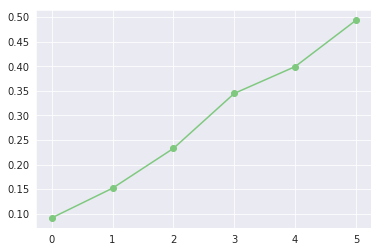

In [13]:
o1 = end1_counting - start1_counting
o2 = end2_counting - start2_counting
o3 = end3_counting - start3_counting
o4 = end4_counting - start4_counting
o5 = end5_counting - start5_counting
o6 = end6_counting - start6_counting

counting_ord = [o1,o2,o3,o4,o5,o6]

plt.plot(counting_ord, linestyle='-', marker='o')

## Radix MSD

O Radix sort é um algoritmo de ordenação rápido e estável que pode ser usado para ordenar itens que estão identificados por chaves únicas. Cada chave é uma cadeia de caracteres ou número, e o radix sort ordena estas chaves em qualquer ordem relacionada com a lexicografia. O radix é um algoritmo de complexidade O(n) e estável, que  pode começar pelo último dígito, tambem chamado do less significant digit (LSD), ou pelo primeiro dígito, também chamado de most significant digit (MSD). A forma de executar o algoritmo abordando o LSD ou o MSD é diferente, para o LSD aplicamos o counting sort no vetor, levando em consideração apenas o LSD, na primeira iteração para as próximas serão levadas em consideração os próximos digitos, da esquerda para a direita. Já para  para o MDS a abordagem de baldes é usada, é utilizado o counting sort para ordenar parcialmente o vetor levando em consideração o MSD, após a primeira iteração os itens os quais possuem o mesmo MSD ficam dentro do mesmo balde. Para a segunda iteração é levado em consideração o segundo digito da esquerda para a direita e o mesmo processo de baldes é feito, é feita quantas iterações forem preciso até terminar todos os dígitos dos itens do vetor.

In [14]:
def radix_msd(arr):
    RADIX = 10
    maxLength = False
    tmp, placement = -1, 1
 
    while not maxLength:
        maxLength = True
        # declare and initialize buckets
        buckets = [list() for _ in range( RADIX )]
 
        # split aList between lists
        for  i in arr:
            tmp = i // placement
            buckets[tmp % RADIX].append( i )
            if maxLength and tmp > 0:
                maxLength = False
 
        # empty lists into aList array
        a = 0
        for b in range( RADIX ):
            buck = buckets[b]
            for i in buck:
                arr[a] = i
                a += 1
 
        # move to next digit
        placement *= RADIX
        
    return arr

In [15]:
#VETOR 10M
start12_radix_msd = time.time()
radix_msd(vetorzao6)
end12_radix_msd = time.time()

#VETOR 5M
start11_radix_msd = time.time()
radix_msd(vetorzao5)
end11_radix_msd = time.time()


#VETOR 2M
start10_radix_msd = time.time()
radix_msd(vetorzao4)
end10_radix_msd = time.time()

#VETOR 1M
start9_radix_msd = time.time()
radix_msd(vetorzao3)
end9_radix_msd = time.time()

#VETOR 500K
start8_radix_msd = time.time()
radix_msd(vetorzao2)
end8_radix_msd = time.time()

#VETOR 100K
start7_radix_msd = time.time()
radix_msd(vetorzao1)
end7_radix_msd = time.time()

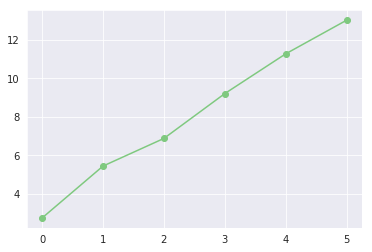

In [16]:
m7 = end7_radix_msd - start7_radix_msd
m8 = end8_radix_msd - start8_radix_msd
m9 = end9_radix_msd - start9_radix_msd
m10 = end10_radix_msd - start10_radix_msd
m11 = end11_radix_msd - start11_radix_msd
m12 = end12_radix_msd - start12_radix_msd

radix_msd = [m7,m8,m9,m10,m11,m12]

plt.plot(radix_msd, linestyle='-', marker='o')

## Heap

Um heap é uma estrutura de dados especializada, baseada em árvore, que é essencialmente uma árvore quase completa que satisfaz a propriedade heap: se P é um nó pai de C, então a chave (o valor) de P é maior que ou igual a (em um  MaxHeap) ou menor que ou igual a ( MinHeap ) chave de C. O nó no "topo" da heap (sem pais) é chamado de nó raiz.

O heap é uma implementação maximamente eficiente de um tipo de dados abstrato chamado de fila de prioridade e, de fato, as filas de prioridade são geralmente chamadas de "heaps", independentemente de como elas podem ser implementadas. Em uma heap, o elemento de prioridade mais alta (ou mais baixa) é sempre armazenado na raiz. No entanto, uma heap não é uma estrutura classificada, ela pode ser considerada parcialmente ordenada. Uma heap é uma estrutura de dados útil quando é necessário remover repetidamente o objeto com a prioridade mais alta (ou mais baixa).

### Build Heap

Build heap: Constrói o heap a partir de um array desordenado, fazendo uso da operação de heapify diversas vezes para preservar os invariantes da estrutura.
Primeiramente iteramos da metade do array ao começo, pois teremos apenas índices válidos para filho a esquerda e filho a direita, próximos a metade.

### Heapify

Heapify: Em síntese, o heapify é uma operação que visa manter a invariante de um dado heap. Em um max heap, por exemplo, o heapify garante que os filhos de cada nó sejam menores ou iguais ao pai.

### Heap Sort

Usando a lógica do build heap e do heapify o build sort, ele monta um MaxHeap usando o build heap e vai retirando a raiz, e mantendo as propriedades do heap usando o heapify. Após retirar todos os itens eles estaram ordenados.

In [17]:
def heapify(arr, n, i): 
    largest = i # Initialize largest as root 
    l = 2 * i + 1     # left = 2*i + 1 
    r = 2 * i + 2     # right = 2*i + 2 
  
    # See if left child of root exists and is 
    # greater than root 
    if l < n and arr[i] < arr[l]: 
        largest = l 
  
    # See if right child of root exists and is 
    # greater than root 
    if r < n and arr[largest] < arr[r]: 
        largest = r 
  
    # Change root, if needed 
    if largest != i: 
        arr[i],arr[largest] = arr[largest],arr[i] # swap 
  
        # Heapify the root. 
        heapify(arr, n, largest) 
  
 
def heap_sort(arr): 
    n = len(arr) 
  
    # Build a maxheap. 
    for i in range(n, -1, -1): 
        heapify(arr, n, i) 
  
    # One by one extract elements 
    for i in range(n-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i] # swap 
        heapify(arr, i, 0)  

#### Chamando o Heap para vetores de tamanho 100k até 10M e calculando o tempo de execução

In [18]:
#VETOR 10M
start18_heap = time.time()
heap_sort(vetorzao6)
end18_heap = time.time()

#VETOR 5M
start17_heap = time.time()
heap_sort(vetorzao5)
end17_heap = time.time()

#VETOR 2M
start16_heap = time.time()
heap_sort(vetorzao4)
end16_heap = time.time()

#VETOR 1M
start15_heap = time.time()
heap_sort(vetorzao3)
end15_heap = time.time()

#VETOR 500K
start14_heap = time.time()
heap_sort(vetorzao2)
end14_heap = time.time()

#VETOR 100K
start13_heap = time.time()
heap_sort(vetorzao1)
end13_heap = time.time()

#### Colocando os valores de tempo encontrados para vetores de tamanho 100k até 10M em um vetor

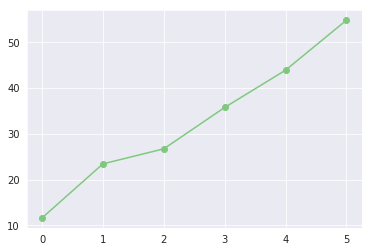

In [19]:
m13 = end13_heap - start13_heap
m14 = end14_heap - start14_heap
m15 = end15_heap - start15_heap
m16 = end16_heap - start16_heap
m17 = end17_heap - start17_heap
m18 = end18_heap - start18_heap

heap = [m13,m14,m15,m16,m17,m18]

plt.plot(heap, linestyle='-', marker='o')

## Radix LSD

In [20]:
def get_digit(n, d):
    for i in range(d-1):
        n //= 10
    return n % 10

def get_num_difit(n):
    i = 0
    while n > 0:
        n //= 10
        i += 1
    return i

def radix_lsd( alist ):
    max_value = max( alist )
    num_digits = get_num_difit(max_value)
    for i in range(num_digits-1):
        arr = counting_sort( alist )
    
    return arr

In [21]:
#VETOR 10M
start12_radix_lsd = time.time()
radix_lsd(vetorzao6)
end12_radix_lsd = time.time()

#VETOR 5M
start11_radix_lsd = time.time()
radix_lsd(vetorzao5)
end11_radix_lsd = time.time()


#VETOR 2M
start10_radix_lsd = time.time()
radix_lsd(vetorzao4)
end10_radix_lsd = time.time()

#VETOR 1M
start9_radix_lsd = time.time()
radix_lsd(vetorzao3)
end9_radix_lsd = time.time()

#VETOR 500K
start8_radix_lsd = time.time()
radix_lsd(vetorzao2)
end8_radix_lsd = time.time()

#VETOR 100K
start7_radix_lsd = time.time()
radix_lsd(vetorzao1)
end7_radix_lsd = time.time()

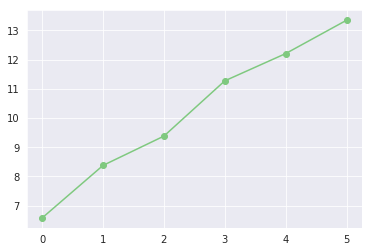

In [22]:
m19 = end7_radix_lsd - start7_radix_lsd
m20 = end8_radix_lsd - start8_radix_lsd
m21 = end9_radix_lsd - start9_radix_lsd
m22 = end10_radix_lsd - start10_radix_lsd
m23 = end11_radix_lsd - start11_radix_lsd
m24 = end12_radix_lsd - start12_radix_lsd

radix_lsd = [m19,m20,m21,m22,m23,m24]

plt.plot(radix_lsd, linestyle='-', marker='o')

In [23]:
d = {'Heap':heap,'Radix MSD': radix_msd,'Radix LSD': radix_lsd}
d = pd.DataFrame(d)
d

,Heap,Radix MSD,Radix LSD
0,11.616010,2.752594,6.582007
1,23.432747,5.445422,8.378149
2,26.712535,6.879785,9.380621
3,35.763723,9.207474,11.270539
4,43.907353,11.270601,12.203037
5,54.821195,13.016013,13.343349


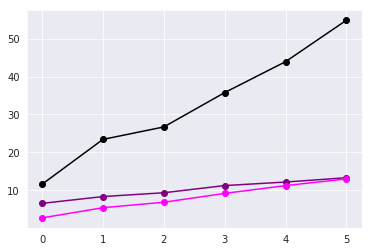

In [24]:
plt.plot(heap, linestyle='-', marker='o',color='black')
plt.plot(radix_lsd, linestyle='-', marker='o',color='purple')
plt.plot(radix_msd, linestyle='-', marker='o',color='magenta')

In [25]:
d = {'Quick':quick,'Shell':shell}
d = pd.DataFrame(d)
d

,Quick,Shell
0,3.790094,3.189031
1,8.506753,7.034714
2,10.923028,8.790173
3,16.106898,11.550778
4,18.333915,13.955194
5,21.964472,16.328326


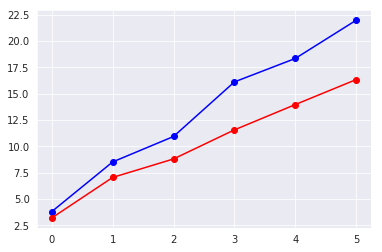

In [26]:
plt.plot(quick, linestyle='-', marker='o', color='blue')
plt.plot(shell, linestyle='-', marker='o',color='red')

In [27]:
do = {'Counting Ordenado': counting_ord,'Counting Desordenado': counting}
do = pd.DataFrame(do)
do

,Counting Ordenado,Counting Desordenado
0,0.091491,1.083398
1,0.151917,1.306993
2,0.232778,1.465430
3,0.344600,1.767786
4,0.399131,1.940523
5,0.493362,2.117072


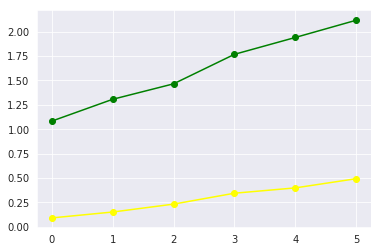

In [28]:
plt.plot(counting, linestyle='-', marker='o',color='green')
plt.plot(counting_ord, linestyle='-', marker='o',color='yellow')

In [29]:
d = {'Heap':heap,'Radix MSD': radix_msd,'Radix LSD': radix_lsd,'Quick':quick,'Shell':shell,'Counting Ordenado': counting_ord,'Counting Desordenado': counting}
d = pd.DataFrame(d)
d

,Heap,Radix MSD,Radix LSD,Quick,Shell,Counting Ordenado,Counting Desordenado
0,11.616010,2.752594,6.582007,3.790094,3.189031,0.091491,1.083398
1,23.432747,5.445422,8.378149,8.506753,7.034714,0.151917,1.306993
2,26.712535,6.879785,9.380621,10.923028,8.790173,0.232778,1.465430
3,35.763723,9.207474,11.270539,16.106898,11.550778,0.344600,1.767786
4,43.907353,11.270601,12.203037,18.333915,13.955194,0.399131,1.940523
5,54.821195,13.016013,13.343349,21.964472,16.328326,0.493362,2.117072


<Figure size 1440x720 with 0 Axes>

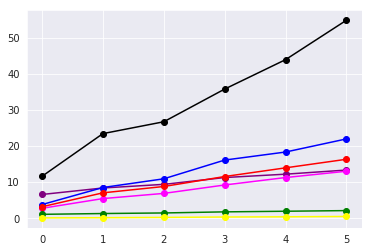

<Figure size 1440x720 with 0 Axes>

In [30]:
plt.plot(heap, linestyle='-', marker='o',color='black')
plt.plot(radix_lsd, linestyle='-', marker='o',color='purple')
plt.plot(radix_msd, linestyle='-', marker='o',color='magenta')
plt.plot(counting, linestyle='-', marker='o',color='green')
plt.plot(counting_ord, linestyle='-', marker='o',color='yellow')
plt.plot(quick, linestyle='-', marker='o', color='blue')
plt.plot(shell, linestyle='-', marker='o',color='red')
plt.figure(figsize=(20,10))
